# **CUSTOMER PERSONALITY ANALYSIS**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

The company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

In [1]:
# General Libraries

import warnings
warnings.filterwarnings('ignore')

# Data Explotation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualization
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
#laoding the data
data=pd.read_csv('/content/marketing_campaign (1).csv', sep='\t')

In [ ]:
#preview of the data
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Undergraduate,single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Undergraduate,single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Undergraduate,married,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Undergraduate,married,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,Postgraduate,married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [ ]:
#number of rows and columns
data.shape

(2240, 29)

# Missing Values and duplicates

In [57]:
data.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

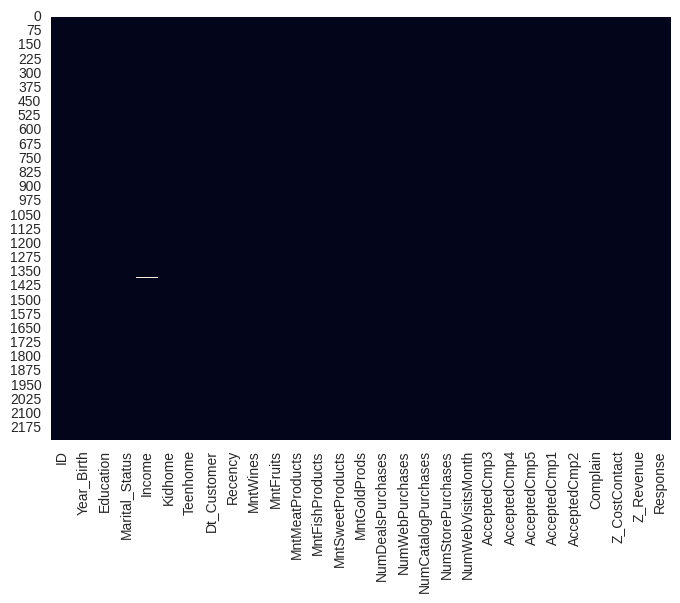

In [18]:
#visualizing the missingness
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [4]:
#filling the income column with median income
data['Income']=data['Income'].fillna(data['Income'].mean())

In [20]:
#checking for duplicates
data.duplicated().sum()

0

# Dropping non-consequential columns

In [5]:
#checking for the unique values in all columns
data.nunique().sort_values(ascending=True)

Z_Revenue                 1
Z_CostContact             1
Response                  2
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp2              2
Complain                  2
AcceptedCmp1              2
AcceptedCmp5              2
Kidhome                   3
Teenhome                  3
Education                 5
Marital_Status            8
NumCatalogPurchases      14
NumStorePurchases        14
NumDealsPurchases        15
NumWebPurchases          15
NumWebVisitsMonth        16
Year_Birth               59
Recency                 100
MntFruits               158
MntSweetProducts        177
MntFishProducts         182
MntGoldProds            213
MntMeatProducts         558
Dt_Customer             663
MntWines                776
Income                 1975
ID                     2240
dtype: int64

The columns Z_CostContact and Z_Revenue have only one unique value: hence these column will not have any value to modelling

In [6]:
#dropping columns
data=data.drop(['Z_CostContact','Z_Revenue'], axis=1)

# Transforming the columns

In [59]:
data['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [7]:
#replacing the values in the education with either undergraduate or post graduate
data['Education']=data['Education'].replace(['Graduation','Basic'], 'Undergraduate')
data['Education']=data['Education'].replace(['PhD','Master','2n Cycle'],'Postgraduate')

In [41]:
#value counts of the marital status
data['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [8]:
#Replacing the values in the marriage column with either single or marrried
data['Marital_Status']=data['Marital_Status'].replace(['Married','Together'],'married')
data['Marital_Status']=data['Marital_Status'].replace(['Single','Divorced','Widow','Alone', 'YOLO','Absurd'],'single')

In [9]:
#making the namesof the purchase products easier to read
data = data.rename(columns = {'MntWines':'Wines','MntFruits':'Fruits',
       'MntMeatProducts':'Meat', 'MntFishProducts':'Fish', 'MntSweetProducts':'Sweet',
       'MntGoldProds':'Gold'})
#creating a new column ''purchase' containing the total amount purchased for each customer
data['purchased']=data['Wines']+data['Fruits']+data['Meat']+data['Fish']+data['Sweet']+data['Gold']

In [44]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,purchased
0,5524,1957,Undergraduate,single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617
1,2174,1954,Undergraduate,single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27
2,4141,1965,Undergraduate,married,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776
3,6182,1984,Undergraduate,married,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53
4,5324,1981,Postgraduate,married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422


In [10]:
data['age'] = 2015 - data['Year_Birth']

In [11]:
#converting the date
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'],format = '%d-%m-%Y')
#number of years since enrollment, data collected in 2015
data['years'] = 2015 - data['Dt_Customer'].dt.year

In [12]:
#dropping columns
data=data.drop(['Dt_Customer','Year_Birth', 'ID'], axis=1)

In [27]:
#create a column for number of children a customer has
data['children'] = data[['Kidhome' , 'Teenhome']].sum(axis=1) #number of children that customer has
#drop the kids and teen columns
data.drop(['kidhome' , 'teenhome'] , axis = 1 , inplace = True)

# Exploratory Data Analysis

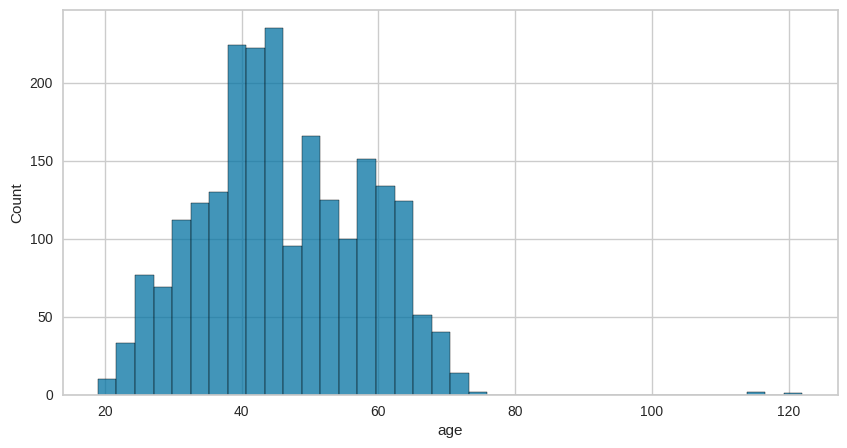

In [13]:
#Visualize customers according to the birth year
plt.figure(figsize=(10,5))
sns.histplot(data['age'])
plt.show()

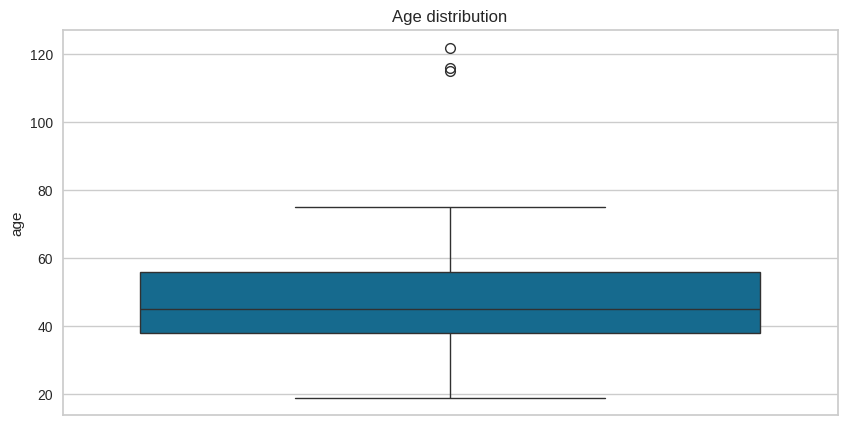

In [14]:
#Visualize customers according to the birth year
plt.figure(figsize=(10,5))
sns.boxplot(data['age'])
plt.title('Age distribution')
plt.show()

In the income and age column we have outliers. we can cap this outliers so that we have customers with income below 60,000 and age below 90

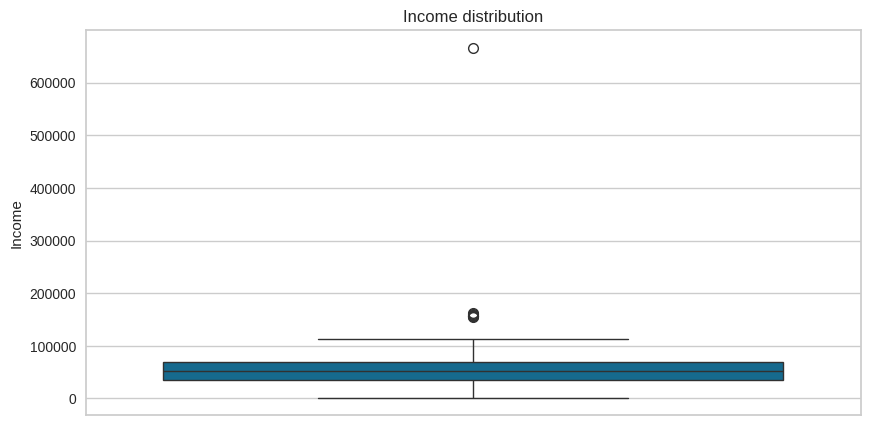

In [15]:
#boxplot to view customers' income
plt.figure(figsize=(10,5))
sns.boxplot(data['Income'])
plt.title('Income distribution')
plt.show()

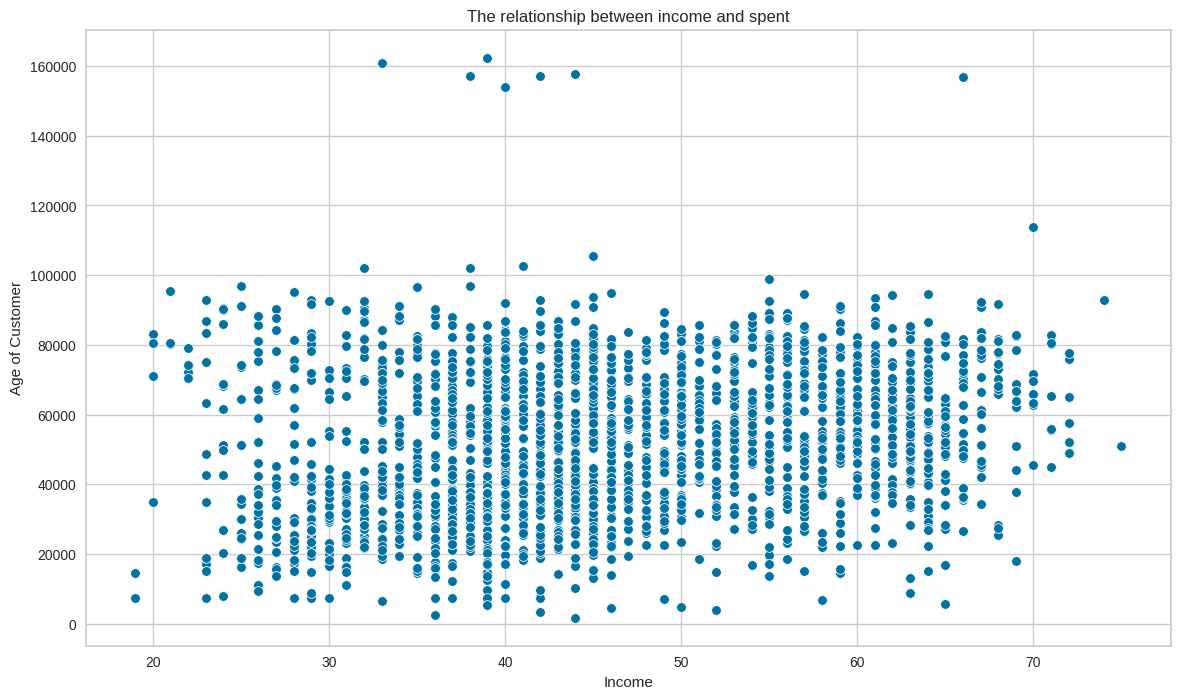

In [31]:
#scatterplot of income and spent amount on products
plt.figure(figsize=(14,8))
sns.scatterplot(data = data , y = 'Income' , x='age')
plt.xlabel('Income')
plt.ylabel('Age of Customer')
plt.title('The relationship between income and spent')
plt.show()

In [16]:
#Dropping the outliers by setting a cap on Age and income.
data = data[(data["age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2236


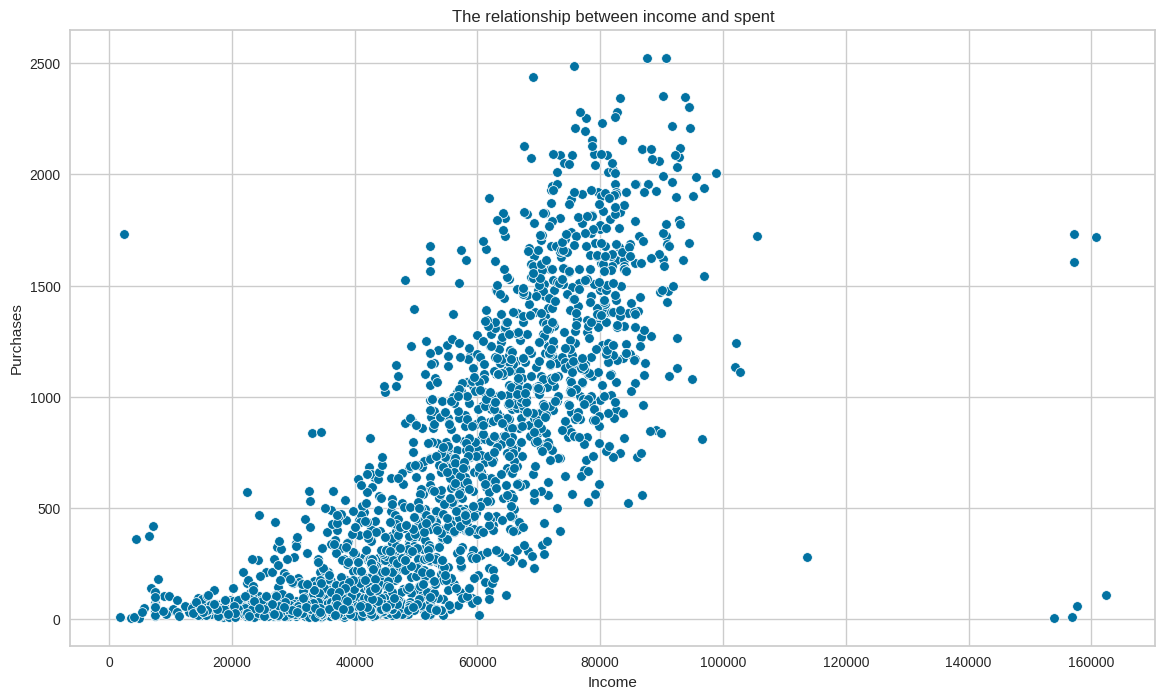

In [17]:
#scatterplot of income and spent amount on products
plt.figure(figsize=(14,8))
sns.scatterplot(data = data , x = 'Income' , y ='purchased')
plt.xlabel('Income')
plt.ylabel('Purchases')
plt.title('The relationship between income and spent')
plt.show()

# **Exploring Data Analysis**

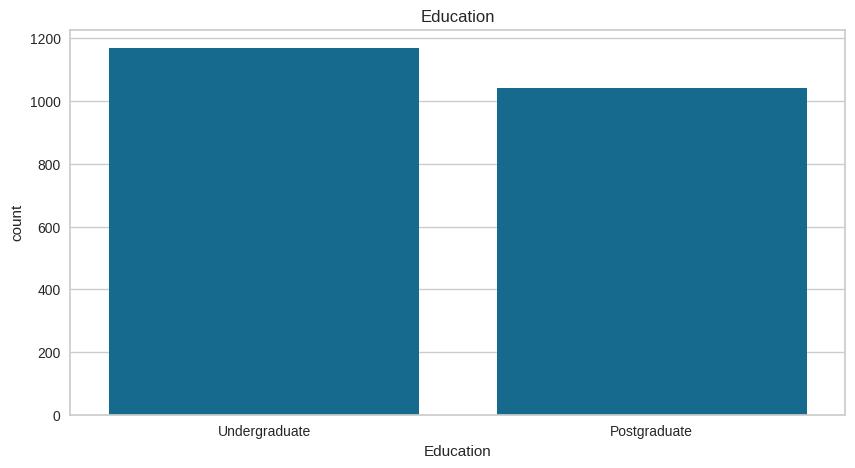

In [76]:
#Relationship between education and customer
plt.figure(figsize=(10,5))
sns.countplot(x=data['Education'], orient='v')
plt.title('Education')
plt.show()

Graduates are more than people with phd or masters

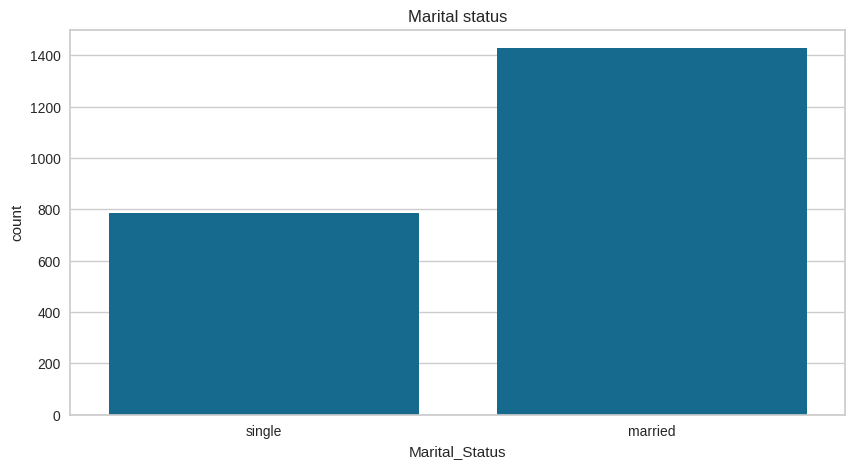

In [75]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['Marital_Status'], orient='v' )
plt.title('Marital status')
plt.show()

Married people are more than the singles, divorced and widows.

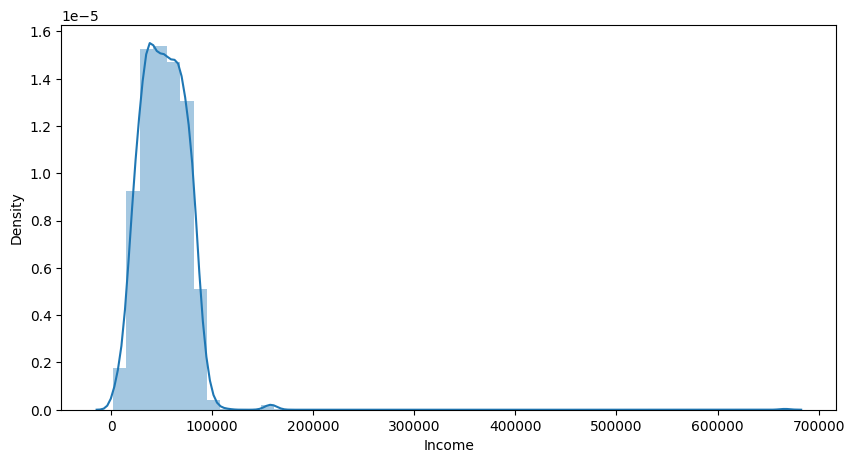

In [ ]:
#the income distribution of this customer segment
plt.figure(figsize=(10,5))
sns.distplot(data['Income'])
plt.title('Income distribution')
plt.show()

The income is right skewed, with most customers having a income below 10,000


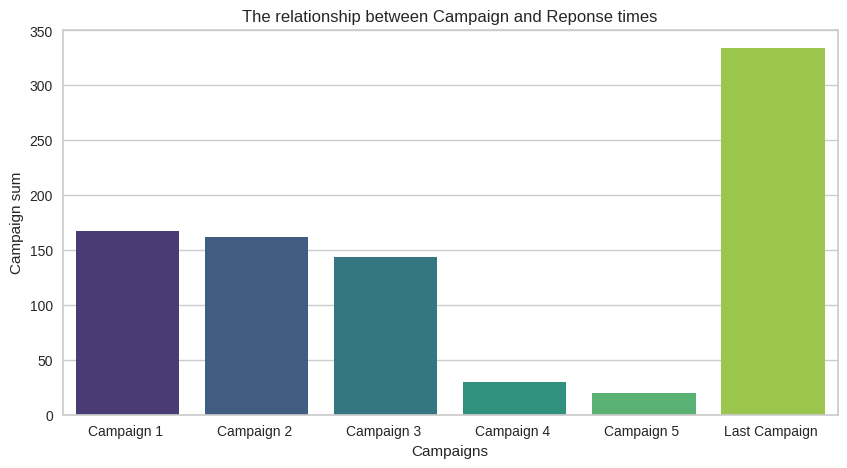

In [25]:
campaigns = ['AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain','Response']
campaign_sum = [data[campaign].sum() for campaign in campaigns ]

plt.figure(figsize=(10,5))
sns.barplot( x = ['Campaign 1 ' , 'Campaign 2 ', 'Campaign 3 ' , 'Campaign 4 ' ,'Campaign 5 ' ,  'Last Campaign ' ] , y = campaign_sum ,
            palette='viridis')
plt.xlabel('Campaigns')
plt.ylabel('Campaign sum')
plt.title('The relationship between Campaign and Reponse times')
plt.show()

Most customers accepted the offer in the last campaign.

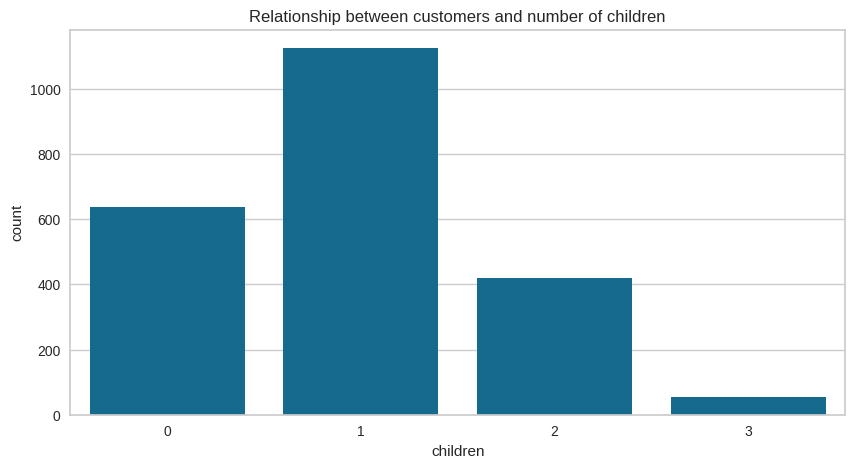

In [29]:
#Relation between customer and number of children
plt.figure(figsize=(10,5))
sns.countplot(x=data['children'], orient='v')
plt.title('Relationship between customers and number of children')
plt.show()

Most customers have one child, while a minority of the customers have 3 children.

# Encoding the Data

In [38]:
#select ting categorical columns
cat_cols=data.select_dtypes(include='object').columns
#initialize label encoder
label_encoder=LabelEncoder()
#encode the categorical columns
data[cat_cols]=data[cat_cols].apply(label_encoder.fit_transform)

In [39]:
num_cols=data.select_dtypes(include='number').columns
Scaler = StandardScaler()
data[num_cols] = Scaler.fit_transform(data[num_cols])

In [40]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,purchased,age,years,children
0,0.946000,1.347635,0.288513,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,0.348738,1.407639,2.509801,-0.552429,0.692865,-0.28041,-0.284104,-0.279482,-0.262362,-0.116616,-0.095001,2.386338,1.680176,1.016868,1.500981,-1.264308
1,0.946000,1.347635,-0.262438,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-0.168700,-1.110921,-0.568970,-1.167738,-0.131421,-0.28041,-0.284104,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-0.962202,1.273264,-1.419988,1.395139
2,0.946000,-0.742041,0.917992,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,-0.686137,1.407639,-0.226884,1.293496,-0.543564,-0.28041,-0.284104,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,0.282541,0.333146,0.040496,-1.264308
3,0.946000,-0.742041,-1.182621,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,-0.168700,-0.751127,-0.911056,-0.552429,0.280722,-0.28041,-0.284104,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-0.918994,-1.290693,-1.419988,0.065416
4,-1.057083,-0.742041,0.295754,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,1.383614,0.328256,0.115201,0.062879,-0.131421,-0.28041,-0.284104,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-0.305762,-1.034298,-1.419988,0.065416


# Dimensionality Reduction

There are a lot of features in the dataset, and we want to reduce their number, leaving as much information as possible
We have many features in the dataset, and we want to visualize the data (for example, in 3D space)
Solving the problem of multicollinearity

In [41]:
#Making a copy of the data
df=data.copy()

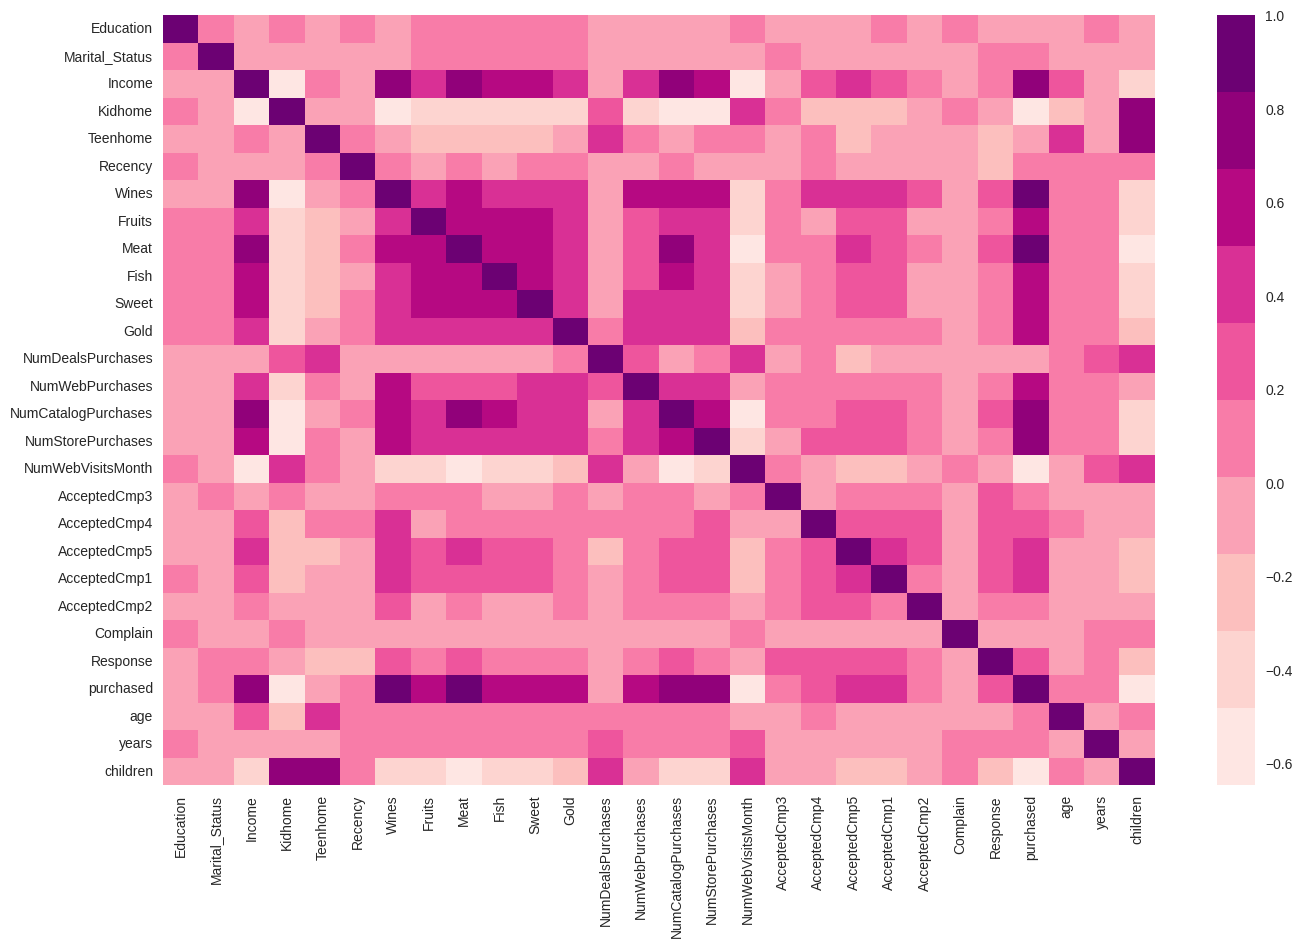

In [42]:
#correlation heat map of the features
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(df.corr(),
            cmap= sns.color_palette("RdPu", 10),
            ax=ax)
plt.show()